In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import data into Python environment.
complaint = pd.read_csv("C:\\Users\\anshul29\\Documents\\Python Scripts\\Comcast_telecom_complaints_data.csv")

In [3]:
#To view the dataset
complaint.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
#To know how data has rows and columns
complaint.shape

(2224, 11)

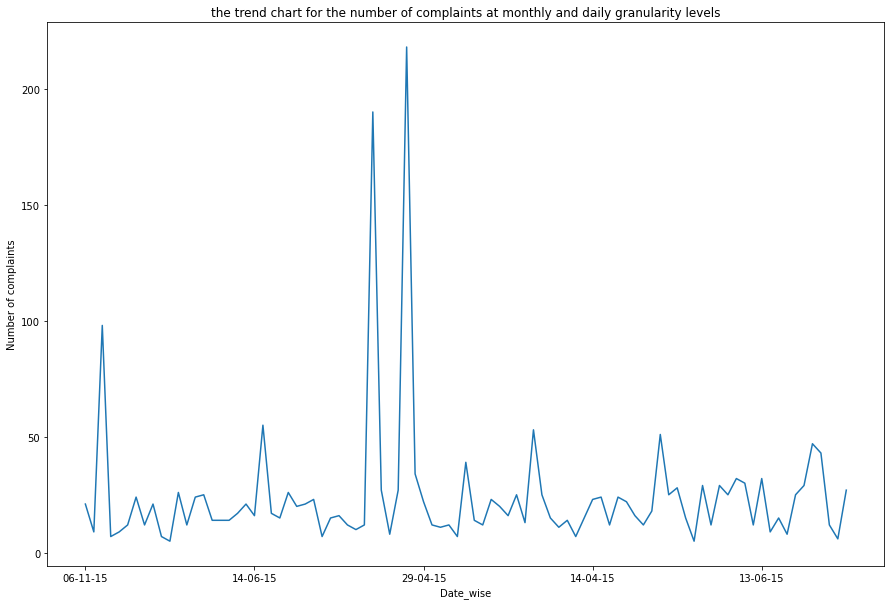

In [5]:
#the trend chart for the number of complaints at monthly and daily granularity levels.
complaints_datewise=complaint.sort_values(by='Date').reset_index(drop=True)
complaints_datewise


plt.figure(figsize=(15,10))
complaints_datewise['Date'].value_counts(sort=False).plot()
plt.title("the trend chart for the number of complaints at monthly and daily granularity levels")
plt.xlabel("Date_wise")
plt.ylabel("Number of complaints")
plt.show()

In [8]:

complaints_monthwise=complaint.sort_values(by='Date').reset_index(drop=True)
complaints_monthwise['month']=pd.to_datetime(complaint['Date_month_year']).dt.strftime('%b')
complaints_monthwise.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,211976,Fraudulent claims reported to collections agency,04-01-15,04-Jan-15,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,Closed,No,Apr
1,211677,Comcast refusal of service,04-01-15,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No,Aug
2,212507,Comcast Cable,04-01-15,04-Jan-15,3:54:43 PM,Internet,Franklin,Tennessee,37067,Closed,No,Apr
3,213120,Data Overages,04-01-15,04-Jan-15,8:05:57 PM,Internet,Savannah,Georgia,31406,Closed,No,Jul
4,211478,Comcast,04-01-15,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No,May


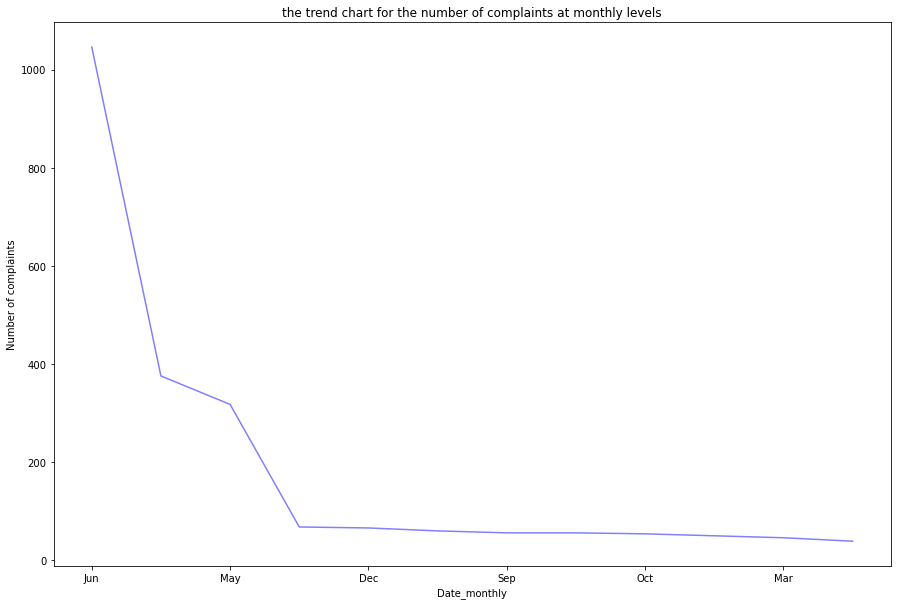

In [9]:
plt.figure(figsize=(15,10))
complaints_monthwise['month'].value_counts().plot(kind='line',color='blue', alpha=0.5)
plt.title("the trend chart for the number of complaints at monthly levels")
plt.xlabel("Date_monthly")
plt.ylabel("Number of complaints")
plt.show()

In [10]:
#a table with the frequency of complaint types.
complaint['Customer Complaint'].value_counts().head(10)


Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Comcast Data Caps           11
Data Caps                   11
Unfair Billing Practices     9
Internet speed               8
Comcast data caps            8
Name: Customer Complaint, dtype: int64

In [11]:
#complaint type which is maximum
print("THE COMPLAINT TYPE WITH MAXIMUM COMPLAINTS IS",complaint['Customer Complaint'].value_counts().idxmax())


THE COMPLAINT TYPE WITH MAXIMUM COMPLAINTS IS Comcast


In [12]:
#Create a new categorical variable with value as Open and Closed
complaint['Status'].value_counts()


Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [14]:
# Categorizing Open & Pending as 'Open' and Closed & Solved as 'Closed'.
complaint_new= complaint.replace(to_replace=['Solved','Pending'], value=['Closed','Open'])
complaint_new.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No


In [15]:
#checking if categoriazation done properly
complaint_new['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

In [16]:
#creating a separate dataframe putting states on index and status as columns
comp_status=pd.crosstab(complaint_new.State,complaint_new.Status)
comp_status.head()

Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22


<Figure size 1080x720 with 0 Axes>

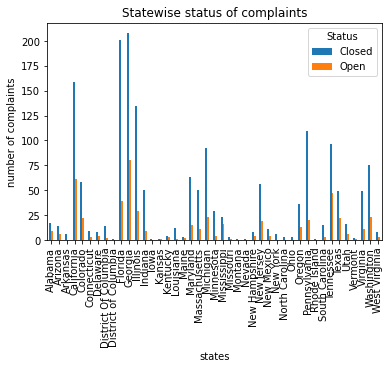

In [18]:
#looking complaints statewise in stacked bar

plt.figure(figsize=(15,10))
comp_status.plot(kind='bar')
plt.title("Statewise status of complaints")
plt.xlabel("states")
plt.ylabel("number of complaints")
plt.show()

In [19]:
#to know which state has max complaints
comp_status['Total_complaints']=comp_status.Closed+comp_status.Open
comp_status.head()

Status,Closed,Open,Total_complaints
State,,,
Alabama,17,9,26
Arizona,14,6,20
Arkansas,6,0,6
California,159,61,220
Colorado,58,22,80


In [20]:
i,j= comp_status['Total_complaints'].idxmax(), comp_status.Total_complaints.max()
print("State", i, 'has maximum number of complaints with', j)

State Georgia has maximum number of complaints with 288


In [21]:
comp_status['open_percentage'] = comp_status.Open/comp_status['Total_complaints']*100
comp_status['closed_percentage'] = comp_status.Closed/comp_status['Total_complaints']*100
comp_status.head()

Status,Closed,Open,Total_complaints,open_percentage,closed_percentage
State,,,,,
Alabama,17,9,26,34.615385,65.384615
Arizona,14,6,20,30.000000,70.000000
Arkansas,6,0,6,0.000000,100.000000
California,159,61,220,27.727273,72.272727
Colorado,58,22,80,27.500000,72.500000


In [22]:
a, b = comp_status.open_percentage.idxmax(), comp_status.open_percentage.max()
print("State", a, 'has maximum number of unresolved complaints percentage with', b,'%')

State Kansas has maximum number of unresolved complaints percentage with 50.0 %


In [23]:
comp_via=pd.crosstab(complaint_new['Received Via'],complaint_new.Status)
comp_via

Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [24]:
Total_closed=np.sum(comp_via.Closed)
Total_open=np.sum(comp_via.Open)
x=Total_closed/(Total_open+Total_closed)*100
print("The percentage of complaints resolved till date, which were received through the Internet and customer care calls is", x,"%")

The percentage of complaints resolved till date, which were received through the Internet and customer care calls is 76.75359712230215 %
